<a href="https://colab.research.google.com/github/Shriharsh-Deshmukh/100-Days-100-Models/blob/main/(Pr_7)diabetes_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data loading and exploration**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = load_diabetes()
X = data.data
y = data.target

# **Data preprocessing (scaling and splitting)**

In [3]:
data_df = pd.DataFrame(X, columns=data.feature_names)
data_df['target'] = y

In [4]:

print("Dataset Preview:")
print(data_df.head())

Dataset Preview:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Model training using Stochastic Gradient Descent (SGD)**

In [7]:

model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

SGDRegressor(random_state=42)

In [8]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# **Evaluation of the model**

In [9]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [10]:
print("\nModel Evaluation:")
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Train R2: {r2_train:.2f}")
print(f"Test R2: {r2_test:.2f}")


Model Evaluation:
Train MSE: 2895.66
Test MSE: 2884.45
Train R2: 0.52
Test R2: 0.46


# **Visualization of results**

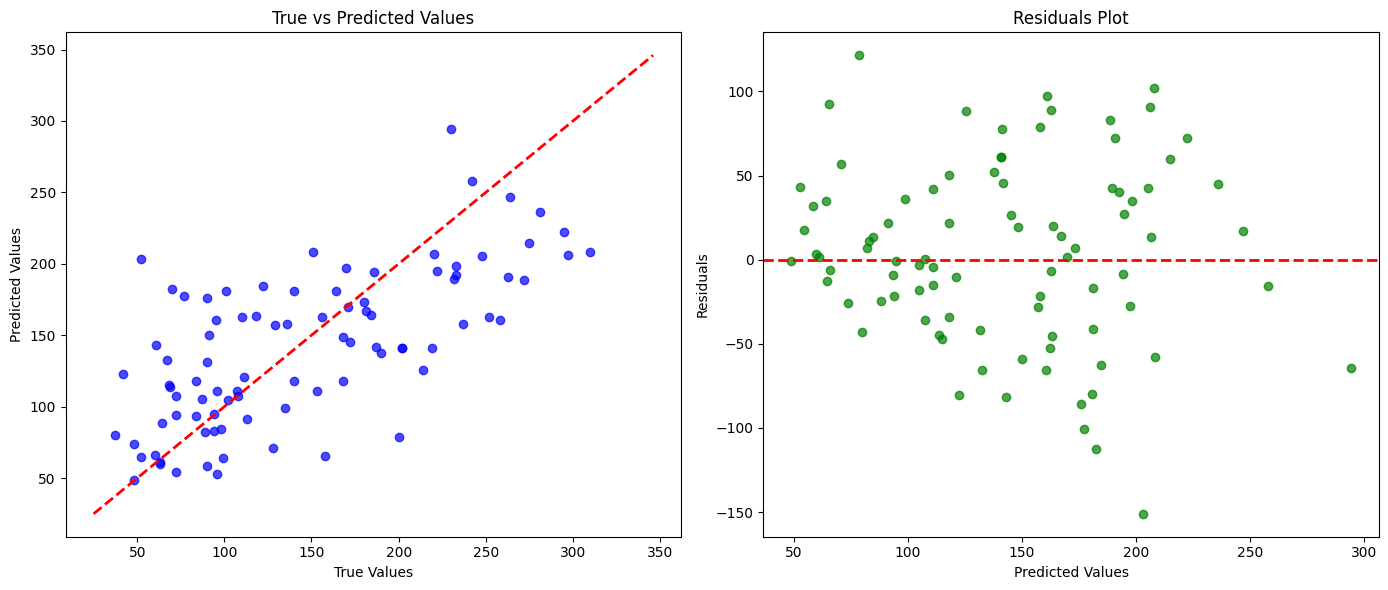

In [11]:

plt.figure(figsize=(14, 6))

# Plot true vs predicted values for the test set
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2)
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Plot residuals
residuals = y_test - y_pred_test
plt.subplot(1, 2, 2)
plt.scatter(y_pred_test, residuals, alpha=0.7, color='green')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()